In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report
)

In [14]:
df = pd.read_csv("exams.csv")

In [15]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [17]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include="object"):
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [18]:

X_reg = df_encoded.drop("math score", axis=1)
y_reg = df_encoded["math score"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

linear_model = LinearRegression()
linear_model.fit(X_train_r, y_train_r)

y_pred_r = linear_model.predict(X_test_r)

# Regression Metrics
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("\n--- Linear Regression Results ---")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


--- Linear Regression Results ---
Mean Squared Error: 26.012298335116352
R2 Score: 0.8821714132830759


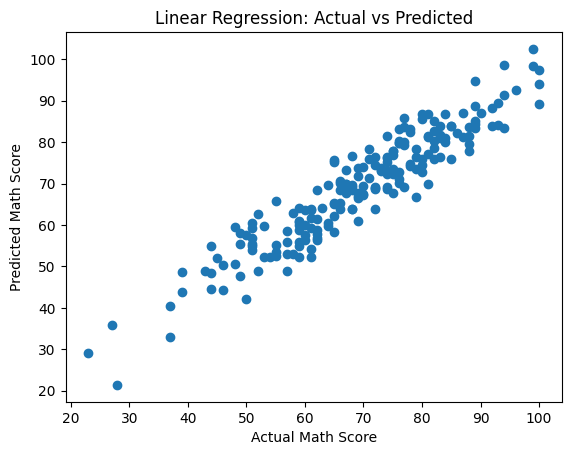

In [19]:
# Plot: Actual vs Predicted
plt.scatter(y_test_r, y_pred_r)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [20]:

# Create target variable
df_encoded["pass"] = df_encoded["math score"].apply(
    lambda x: 1 if x >= 40 else 0
)

X_cls = df_encoded.drop(["math score", "pass"], axis=1)
y_cls = df_encoded["pass"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

In [21]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)

y_pred_log = log_model.predict(X_test_c)

print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_log))
print(classification_report(y_test_c, y_pred_log))


--- Logistic Regression Results ---
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.98      0.99      0.99       193

    accuracy                           0.97       200
   macro avg       0.86      0.71      0.77       200
weighted avg       0.97      0.97      0.97       200



#logistic Regression

In [22]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_c, y_train_c)

y_pred_tree = tree_model.predict(X_test_c)

print("\n--- Decision Tree Results ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_tree))
print(classification_report(y_test_c, y_pred_tree))


--- Decision Tree Results ---
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.99      0.98      0.99       193

    accuracy                           0.97       200
   macro avg       0.81      0.85      0.83       200
weighted avg       0.98      0.97      0.98       200



#Decision Tree Classifier